In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import joblib



# Função para carregar e preparar os dados
def prepare_data(file_path, target_column, numeric_features, test_size=0.2, random_state=42):
    # Carregar dados
    df = pd.read_csv(file_path)
    
    # Separar em features e target
    X = df[numeric_features]  # Supõe-se que todas as features sejam numéricas
    y = df[target_column]
    
    # Codificar a variável alvo categórica
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    
    # Dividir os dados em conjuntos de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=test_size, random_state=random_state)
    
    # Construir o pré-processador para features numéricas
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),  # Preencher valores ausentes
        ('scaler', StandardScaler())                   # Normalizar dados numéricos
    ])
    
    # Coluna Transformer para aplicar as transformações nas colunas numéricas
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ])
    
    # Pré-processar os dados de treinamento e teste
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)


    # Salvar o pré-processador e o label encoder
    joblib.dump(preprocessor, scaler_path)
    joblib.dump(label_encoder, label_encoder_path)
    
    # Retorna os conjuntos de dados processados e o pré-processador para uso futuro
    return X_train_processed, X_test_processed, y_train, y_test, preprocessor, label_encoder

# Uso da função
file_path = 'spotify_dataset.csv'
target_column = 'Quadrante'
numeric_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'mode', 'time_signature']  
scaler_path = 'preprocessor.joblib'
label_encoder_path = 'label_encoder.joblib'


# Adicione todas as suas features numéricas e categóricas como numéricas aqui

# Prepare os dados
X_train, X_test, y_train, y_test, preprocessor, label_encoder = prepare_data(file_path, target_column, numeric_features)

# Agora X_train, X_test, y_train e y_test estão prontos para serem usados em qualquer modelo de ML.


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Carregar os dados já processados (substitua pelos seus caminhos de arquivo se necessário)
#X_train, X_test, y_train, y_test = ... # Assuma que já estão carregados conforme a etapa anterior

# Inicializar o classificador KNN com um número de vizinhos, por exemplo, 5
knn = KNeighborsClassifier(n_neighbors=5)

# Treinar o modelo KNN com o conjunto de treinamento
knn.fit(X_train, y_train)

# Prever as etiquetas para o conjunto de teste
y_pred = knn.predict(X_test)

# Avaliar o modelo
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Salvar o modelo treinado para uso futuro
#model_path = 'knn_model.joblib'
#joblib.dump(knn, model_path)


              precision    recall  f1-score   support

           0       0.41      0.62      0.49        34
           1       0.64      0.68      0.66        34
           2       0.52      0.40      0.45        35
           3       0.46      0.33      0.39        39

    accuracy                           0.50       142
   macro avg       0.51      0.51      0.50       142
weighted avg       0.51      0.50      0.49       142

Accuracy: 0.5


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

# Definir o modelo KNN
knn = KNeighborsClassifier()

# Definir a grade de parâmetros para a busca em grade
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],  # Varia o número de vizinhos
    'weights': ['uniform', 'distance'],  # Ponderação dos vizinhos
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Métrica de distância
}

# Configurar a busca em grade com validação cruzada
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Treinar o modelo com a busca em grade
grid_search.fit(X_train, y_train)

# Exibir os melhores parâmetros
print("Melhores Parâmetros: ", grid_search.best_params_)
print("Melhor score de validação cruzada (acurácia):", grid_search.best_score_)

# Usar o melhor modelo para fazer previsões no conjunto de teste
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# Avaliar o modelo
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# # Matriz de Confusão
# print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))

# # ROC-AUC (para classificação binária)
# if len(np.unique(y_test)) == 2:  # Verifica se é um problema de classificação binária
#     print("AUC-ROC:", roc_auc_score(y_test, best_knn.predict_proba(X_test)[:, 1]))

# Avaliar o modelo
#print(classification_report(y_test, y_pred))
#print("Accuracy:", accuracy_score(y_test, y_pred))

#Salvar o melhor modelo
joblib.dump(best_knn, 'best_knn_model.joblib')


Melhores Parâmetros:  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Melhor score de validação cruzada (acurácia): 0.6082332490518331
              precision    recall  f1-score   support

           0       0.46      0.76      0.58        34
           1       0.74      0.68      0.71        34
           2       0.46      0.37      0.41        35
           3       0.56      0.38      0.45        39

    accuracy                           0.54       142
   macro avg       0.56      0.55      0.54       142
weighted avg       0.56      0.54      0.53       142

Accuracy: 0.5422535211267606


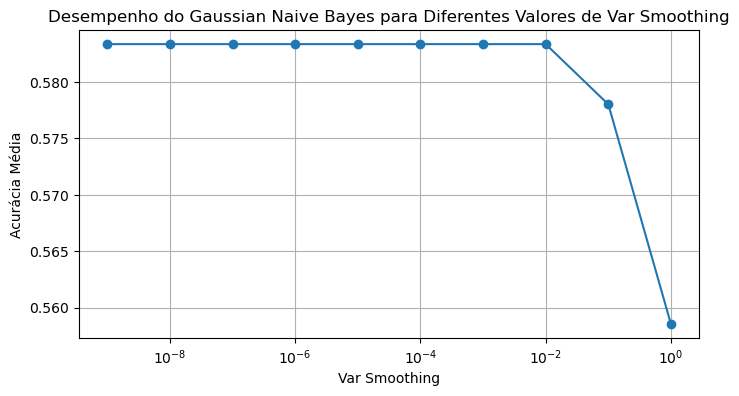

Melhores Parâmetros:  {'var_smoothing': 1e-09}
Melhor score de validação cruzada (acurácia): 0.5833596713021492
              precision    recall  f1-score   support

           0       0.43      0.62      0.51        34
           1       0.67      0.76      0.71        34
           2       0.52      0.40      0.45        35
           3       0.56      0.38      0.45        39

    accuracy                           0.54       142
   macro avg       0.54      0.54      0.53       142
weighted avg       0.54      0.54      0.53       142

Accuracy: 0.5352112676056338


In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import joblib

# Hiperparâmetros para GaussianNB
param_grid_gnb = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]}

# Configurando a busca em grade com validação cruzada
grid_gnb = GridSearchCV(GaussianNB(), param_grid_gnb, cv=5, scoring='accuracy')
grid_gnb.fit(X_train, y_train)

# Exportando o melhor modelo
joblib.dump(grid_gnb.best_estimator_, 'gaussian_nb_best_model.joblib')

# Gráfico de desempenho
scores = grid_gnb.cv_results_['mean_test_score']
plt.figure(figsize=(8, 4))
plt.plot(param_grid_gnb['var_smoothing'], scores, marker='o')
plt.xlabel('Var Smoothing')
plt.ylabel('Acurácia Média')
plt.title('Desempenho do Gaussian Naive Bayes para Diferentes Valores de Var Smoothing')
plt.xscale('log')
plt.grid(True)
plt.show()

# Exibir os melhores parâmetros
print("Melhores Parâmetros: ", grid_gnb.best_params_)
print("Melhor score de validação cruzada (acurácia):", grid_gnb.best_score_)

# Treinando e Avaliando o Gaussian Naive Bayes
best_gnb = grid_gnb.best_estimator_
y_pred_gnb = best_gnb.predict(X_test)  # Atualize esta linha para usar as previsões do Naive Bayes

# Avaliar o modelo Gaussian Naive Bayes
print(classification_report(y_test, y_pred_gnb))
print("Accuracy:", accuracy_score(y_test, y_pred_gnb))


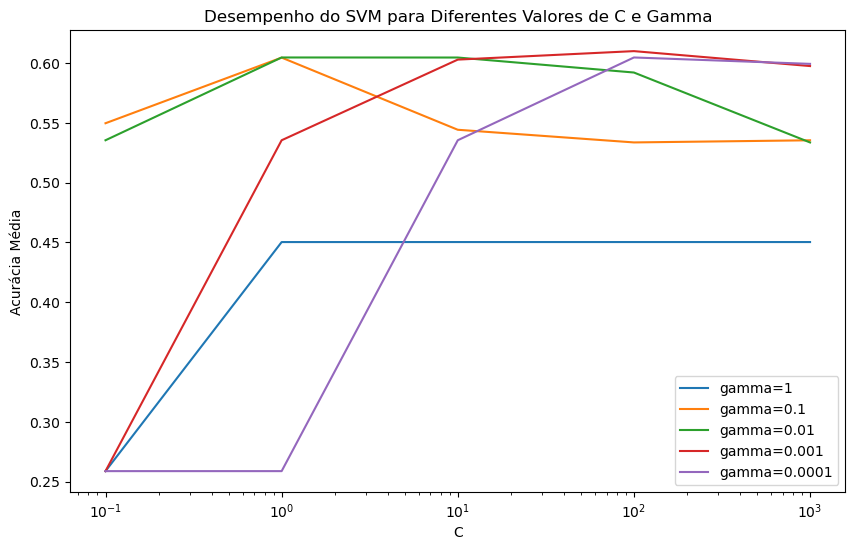

Melhores Parâmetros:  {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Melhor score de validação cruzada (acurácia): 0.6099715549936789
              precision    recall  f1-score   support

           0       0.50      0.68      0.58        34
           1       0.73      0.79      0.76        34
           2       0.52      0.49      0.50        35
           3       0.58      0.38      0.46        39

    accuracy                           0.58       142
   macro avg       0.58      0.59      0.57       142
weighted avg       0.58      0.58      0.57       142

Accuracy: 0.5774647887323944


In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import joblib
import pandas as pd

# Definindo a grade de hiperparâmetros
# Aqui, estamos variando C e gamma para o kernel RBF
param_grid_svm = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

# Configurando a busca em grade com validação cruzada
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

# Exportando o melhor modelo
joblib.dump(grid_svm.best_estimator_, 'svm_best_model.joblib')

# Gráfico de desempenho
results_svm = pd.DataFrame(grid_svm.cv_results_)
plt.figure(figsize=(10, 6))
for gamma in param_grid_svm['gamma']:
    mask = results_svm['param_gamma'] == gamma
    plt.plot(results_svm[mask]['param_C'], results_svm[mask]['mean_test_score'], label=f'gamma={gamma}')
plt.xlabel('C')
plt.ylabel('Acurácia Média')
plt.title('Desempenho do SVM para Diferentes Valores de C e Gamma')
plt.legend()
plt.xscale('log')
plt.show()

# Exibir os melhores parâmetros
print("Melhores Parâmetros: ", grid_svm.best_params_)
print("Melhor score de validação cruzada (acurácia):", grid_svm.best_score_)

# Treinando e Avaliando o svm
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)  

# Avaliar o modelo
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import joblib
import pandas as pd

# Definindo a grade de hiperparâmetros
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4]  # Graus do polinômio (apenas usado para o kernel 'poly')
}

# Configurando a busca em grade com validação cruzada
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)

# Exportando o melhor modelo
joblib.dump(grid_svm.best_estimator_, 'svm_best_model.joblib')

# Preparação dos dados para o gráfico
results_svm = pd.DataFrame(grid_svm.cv_results_)

# Exibir os melhores parâmetros
print("Melhores Parâmetros: ", grid_svm.best_params_)
print("Melhor score de validação cruzada (acurácia):", grid_svm.best_score_)

# Treinando e Avaliando o svm
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)  

# Avaliar o modelo
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

Melhores Parâmetros:  {'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'linear'}
Melhor score de validação cruzada (acurácia): 0.6117730720606828
              precision    recall  f1-score   support

           0       0.51      0.65      0.57        34
           1       0.72      0.82      0.77        34
           2       0.49      0.51      0.50        35
           3       0.52      0.31      0.39        39

    accuracy                           0.56       142
   macro avg       0.56      0.57      0.56       142
weighted avg       0.56      0.56      0.55       142

Accuracy: 0.5633802816901409


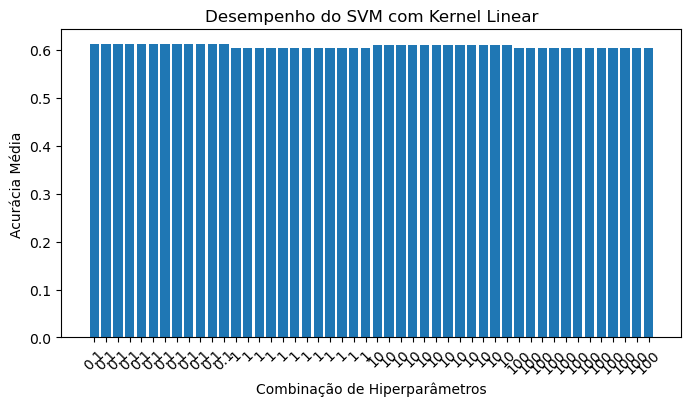

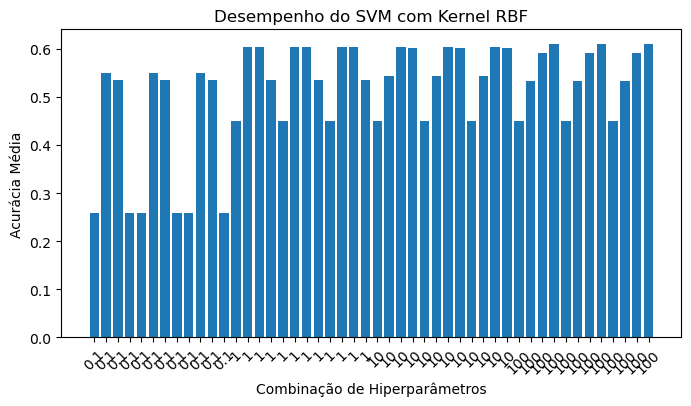

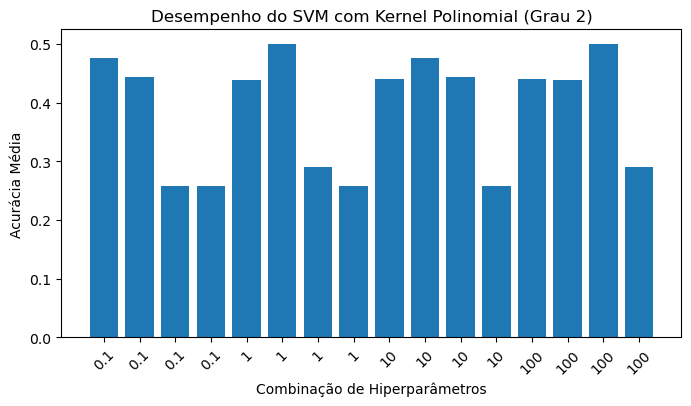

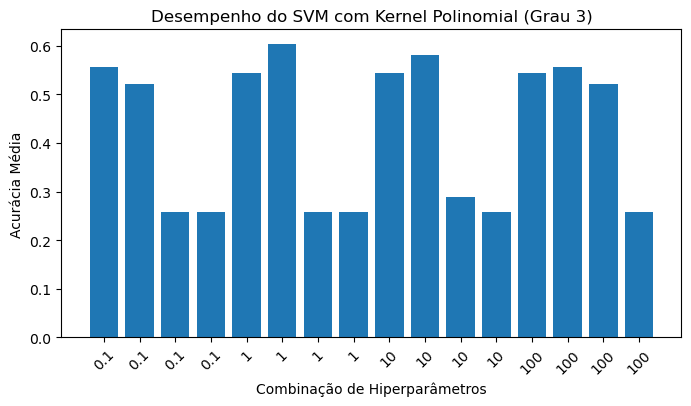

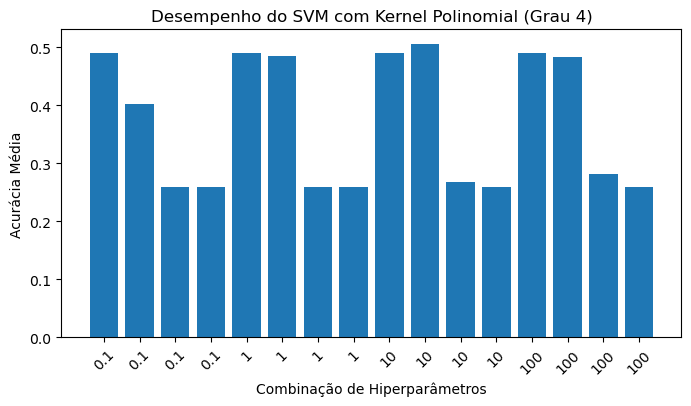

In [26]:
# Filtrar os resultados para o kernel linear
results_linear = results_svm[results_svm['param_kernel'] == 'linear']

plt.figure(figsize=(8, 4))
plt.bar(range(len(results_linear)), results_linear['mean_test_score'])
plt.xlabel('Combinação de Hiperparâmetros')
plt.ylabel('Acurácia Média')
plt.title('Desempenho do SVM com Kernel Linear')
plt.xticks(range(len(results_linear)), labels=results_linear['param_C'], rotation=45)
plt.show()

# Filtrar os resultados para o kernel rbf
results_rbf = results_svm[results_svm['param_kernel'] == 'rbf']

plt.figure(figsize=(8, 4))
plt.bar(range(len(results_rbf)), results_rbf['mean_test_score'])
plt.xlabel('Combinação de Hiperparâmetros')
plt.ylabel('Acurácia Média')
plt.title('Desempenho do SVM com Kernel RBF')
plt.xticks(range(len(results_rbf)), labels=results_rbf['param_C'], rotation=45)
plt.show()

for degree in param_grid_svm['degree']:
    results_poly_degree = results_svm[(results_svm['param_kernel'] == 'poly') & (results_svm['param_degree'] == degree)]

    plt.figure(figsize=(8, 4))
    plt.bar(range(len(results_poly_degree)), results_poly_degree['mean_test_score'])
    plt.xlabel('Combinação de Hiperparâmetros')
    plt.ylabel('Acurácia Média')
    plt.title(f'Desempenho do SVM com Kernel Polinomial (Grau {degree})')
    plt.xticks(range(len(results_poly_degree)), labels=results_poly_degree['param_C'], rotation=45)
    plt.show()


In [27]:
# Extrair a melhor acurácia e combinação para cada kernel
best_linear = results_svm[results_svm['param_kernel'] == 'linear'].nlargest(1, 'mean_test_score')
best_rbf = results_svm[results_svm['param_kernel'] == 'rbf'].nlargest(1, 'mean_test_score')
best_poly = results_svm[results_svm['param_kernel'] == 'poly'].nlargest(1, 'mean_test_score')

# Preparar dados para o gráfico
kernels = ['Linear', 'RBF', 'Polynomial']
accuracies = [best_linear['mean_test_score'].values[0], best_rbf['mean_test_score'].values[0], best_poly['mean_test_score'].values[0]]
combinations = [f"C={best_linear['param_C'].values[0]}", 
                f"C={best_rbf['param_C'].values[0]}, gamma={best_rbf['param_gamma'].values[0]}", 
                f"C={best_poly['param_C'].values[0]}, gamma={best_poly['param_gamma'].values[0]}, degree={best_poly['param_degree'].values[0]}"]


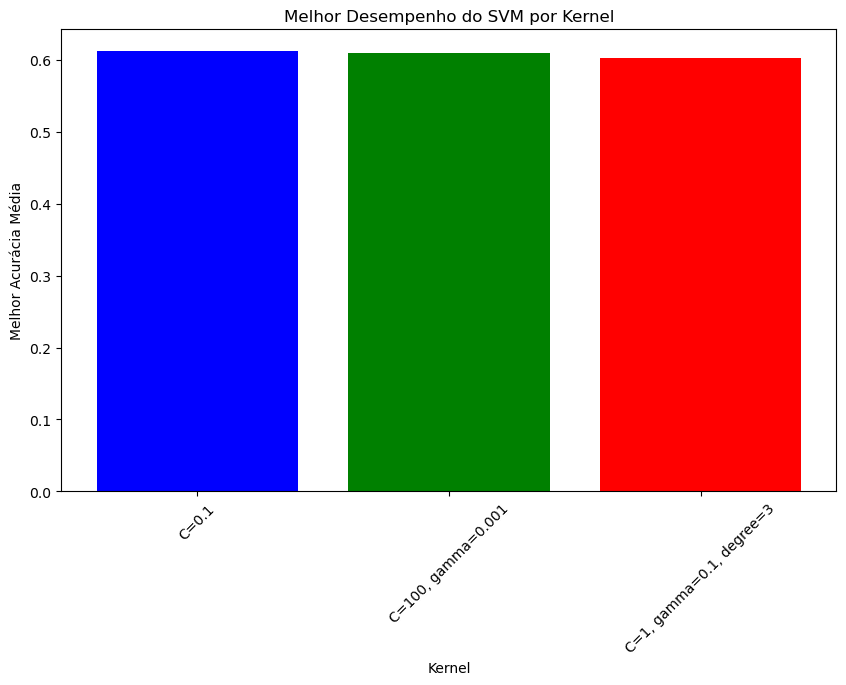

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(kernels, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Kernel')
plt.ylabel('Melhor Acurácia Média')
plt.title('Melhor Desempenho do SVM por Kernel')
plt.xticks(kernels, labels=combinations, rotation=45)
plt.show()


In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import joblib

# Definindo a grade de hiperparâmetros
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4]  # Graus do polinômio (apenas usado para o kernel 'poly')
}

# Configurando a busca em grade com validação cruzada
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)

# Exportando o melhor modelo
joblib.dump(grid_svm.best_estimator_, 'svm_best_model.joblib')

## Exibir os melhores parâmetros
print("Melhores Parâmetros: ", grid_svm.best_params_)
print("Melhor score de validação cruzada (acurácia):", grid_svm.best_score_)

# Treinando e Avaliando o svm
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)  

# Avaliar o modelo
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

Melhores Parâmetros:  {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Melhor score de validação cruzada (acurácia): 0.6117730720606828
              precision    recall  f1-score   support

           0       0.51      0.65      0.57        34
           1       0.72      0.82      0.77        34
           2       0.49      0.51      0.50        35
           3       0.52      0.31      0.39        39

    accuracy                           0.56       142
   macro avg       0.56      0.57      0.56       142
weighted avg       0.56      0.56      0.55       142

Accuracy: 0.5633802816901409


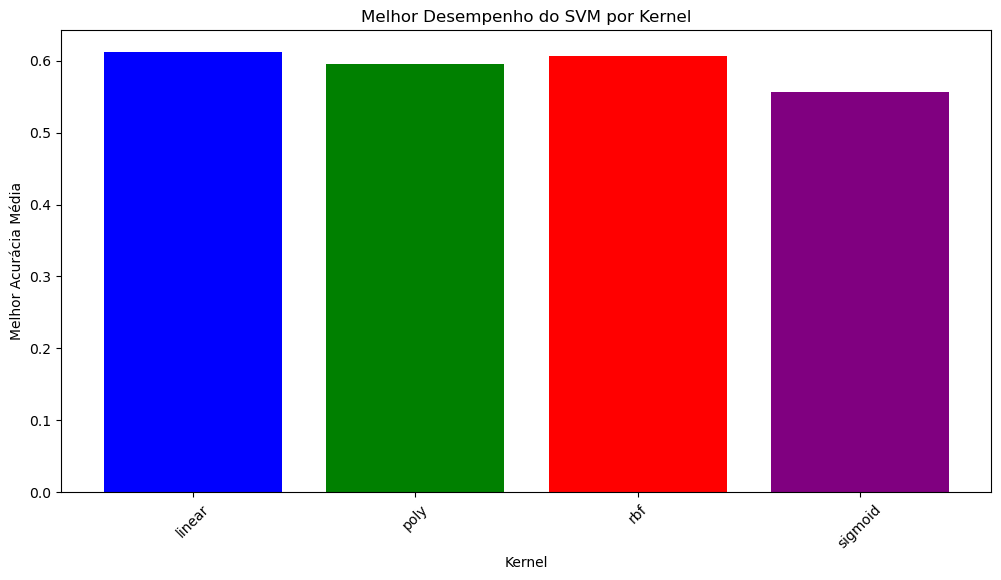

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Preparando os dados do gráfico
results_svm = pd.DataFrame(grid_svm.cv_results_)
best_results = results_svm.groupby('param_kernel')['mean_test_score'].max()

# Extraindo a melhor acurácia e combinação para cada kernel
best_combinations = results_svm.loc[results_svm.groupby('param_kernel')['mean_test_score'].idxmax()]

plt.figure(figsize=(12, 6))
plt.bar(best_combinations['param_kernel'], best_combinations['mean_test_score'], color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Kernel')
plt.ylabel('Melhor Acurácia Média')
plt.title('Melhor Desempenho do SVM por Kernel')
plt.xticks(best_combinations['param_kernel'], labels=best_combinations['param_kernel'], rotation=45)
plt.show()


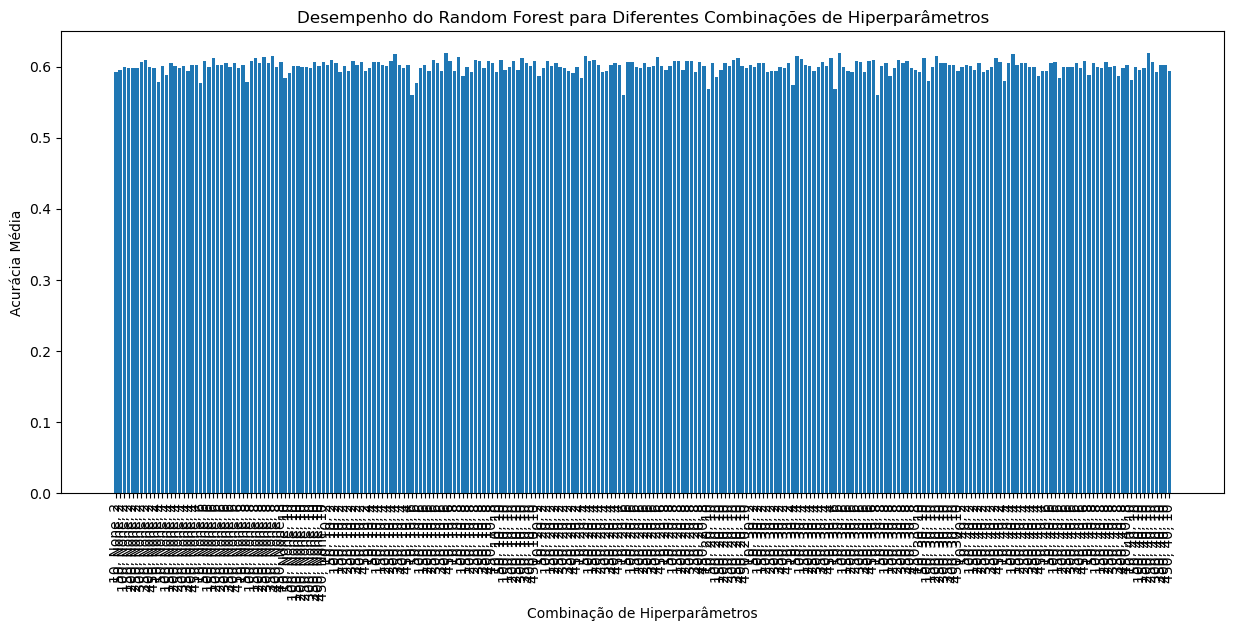

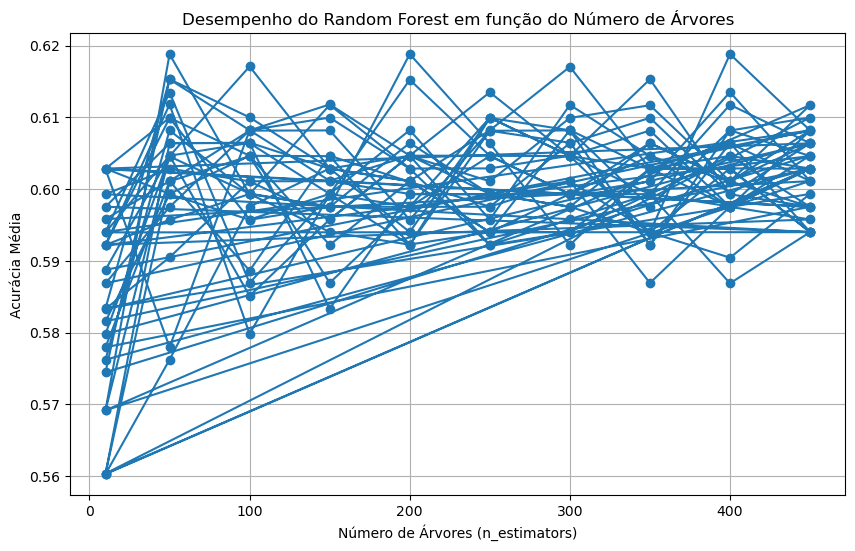

Melhores Parâmetros:  {'max_depth': 10, 'min_samples_split': 6, 'n_estimators': 400}
Melhor score de validação cruzada (acurácia): 0.6188211125158027
              precision    recall  f1-score   support

           0       0.47      0.62      0.53        34
           1       0.75      0.71      0.73        34
           2       0.50      0.34      0.41        35
           3       0.54      0.56      0.55        39

    accuracy                           0.56       142
   macro avg       0.56      0.56      0.55       142
weighted avg       0.56      0.56      0.55       142

Accuracy: 0.5563380281690141


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import joblib
import pandas as pd
import matplotlib.pyplot as plt

# Definindo a grade de hiperparâmetros
param_grid_rf = {
    'n_estimators': [10, 50, 100, 150, 200, 250, 300, 350, 400, 450],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 4, 6, 8, 10]
}

# Configurando a busca em grade com validação cruzada
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Exportando o melhor modelo
joblib.dump(grid_rf.best_estimator_, 'random_forest_best_model.joblib')

# Preparação dos dados para o gráfico
results_rf = pd.DataFrame(grid_rf.cv_results_)

# Gráfico de barras para mostrar o desempenho
plt.figure(figsize=(15, 6))
plt.bar(range(len(results_rf)), results_rf['mean_test_score'])
plt.xlabel('Combinação de Hiperparâmetros')
plt.ylabel('Acurácia Média')
plt.title('Desempenho do Random Forest para Diferentes Combinações de Hiperparâmetros')
plt.xticks(range(len(results_rf)), labels=results_rf['params'].apply(lambda x: f"{x['n_estimators']}, {x['max_depth']}, {x['min_samples_split']}"), rotation=90)
plt.show()

# Gráfico de linha para mostrar a acurácia em função do número de árvores
plt.figure(figsize=(10, 6))
plt.plot(results_rf['param_n_estimators'], results_rf['mean_test_score'], marker='o')
plt.xlabel('Número de Árvores (n_estimators)')
plt.ylabel('Acurácia Média')
plt.title('Desempenho do Random Forest em função do Número de Árvores')
plt.grid(True)
plt.show()

## Exibir os melhores parâmetros
print("Melhores Parâmetros: ", grid_rf.best_params_)
print("Melhor score de validação cruzada (acurácia):", grid_rf.best_score_)

# Treinando e Avaliando
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)  

# Avaliar o modelo
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

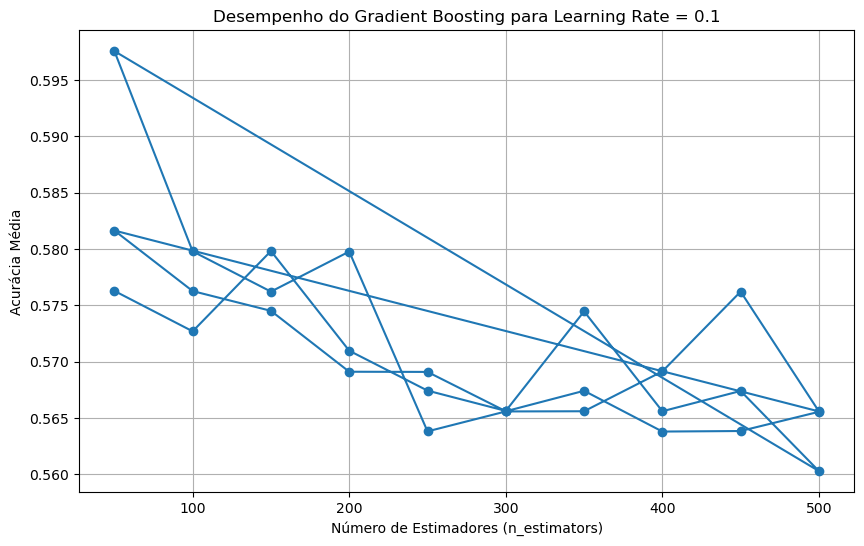

Melhores Parâmetros:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}
Melhor score de validação cruzada (acurácia): 0.6064475347661188
              precision    recall  f1-score   support

           0       0.45      0.65      0.53        34
           1       0.77      0.68      0.72        34
           2       0.43      0.26      0.32        35
           3       0.48      0.51      0.49        39

    accuracy                           0.52       142
   macro avg       0.53      0.52      0.52       142
weighted avg       0.53      0.52      0.51       142

Accuracy: 0.5211267605633803


In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import joblib

# Definindo a grade de hiperparâmetros
param_grid_gb = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Configurando a busca em grade com validação cruzada
grid_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)
grid_gb.fit(X_train, y_train)

# Exportando o melhor modelo
joblib.dump(grid_gb.best_estimator_, 'gradient_boosting_best_model.joblib')

import pandas as pd
import matplotlib.pyplot as plt

# Preparação dos dados para o gráfico
results_gb = pd.DataFrame(grid_gb.cv_results_)

# Filtro para um gráfico mais claro, como 'learning_rate' = 0.1
filtered_results = results_gb[results_gb['param_learning_rate'] == 0.1]

plt.figure(figsize=(10, 6))
plt.plot(filtered_results['param_n_estimators'], filtered_results['mean_test_score'], marker='o')
plt.xlabel('Número de Estimadores (n_estimators)')
plt.ylabel('Acurácia Média')
plt.title('Desempenho do Gradient Boosting para Learning Rate = 0.1')
plt.grid(True)
plt.show()

## Exibir os melhores parâmetros
print("Melhores Parâmetros: ", grid_gb.best_params_)
print("Melhor score de validação cruzada (acurácia):", grid_gb.best_score_)

# Treinando e Avaliando
best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)  

# Avaliar o modelo
print(classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


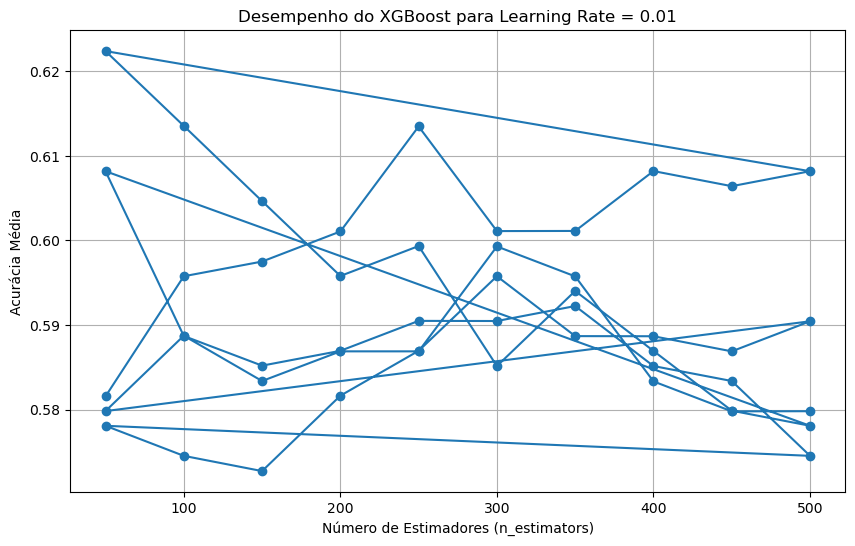

Melhores Parâmetros:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}
Melhor score de validação cruzada (acurácia): 0.6223925410872313
              precision    recall  f1-score   support

           0       0.44      0.59      0.51        34
           1       0.76      0.74      0.75        34
           2       0.38      0.31      0.34        35
           3       0.46      0.41      0.43        39

    accuracy                           0.51       142
   macro avg       0.51      0.51      0.51       142
weighted avg       0.51      0.51      0.50       142

Accuracy: 0.5070422535211268


In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import joblib

# Definindo a grade de hiperparâmetros
param_grid_xgb = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7]
}

# Configurando a busca em grade com validação cruzada
grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

# Exportando o melhor modelo
joblib.dump(grid_xgb.best_estimator_, 'xgboost_best_model.joblib')

import pandas as pd
import matplotlib.pyplot as plt

# Preparação dos dados para o gráfico
results_xgb = pd.DataFrame(grid_xgb.cv_results_)

# Filtro para um gráfico mais claro, como 'learning_rate' = 0.1
filtered_results = results_xgb[results_xgb['param_learning_rate'] == 0.01]

plt.figure(figsize=(10, 6))
plt.plot(filtered_results['param_n_estimators'], filtered_results['mean_test_score'], marker='o')
plt.xlabel('Número de Estimadores (n_estimators)')
plt.ylabel('Acurácia Média')
plt.title('Desempenho do XGBoost para Learning Rate = 0.01')
plt.grid(True)
plt.show()

## Exibir os melhores parâmetros
print("Melhores Parâmetros: ", grid_xgb.best_params_)
print("Melhor score de validação cruzada (acurácia):", grid_xgb.best_score_)

# Treinando e Avaliando
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)  

# Avaliar o modelo
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

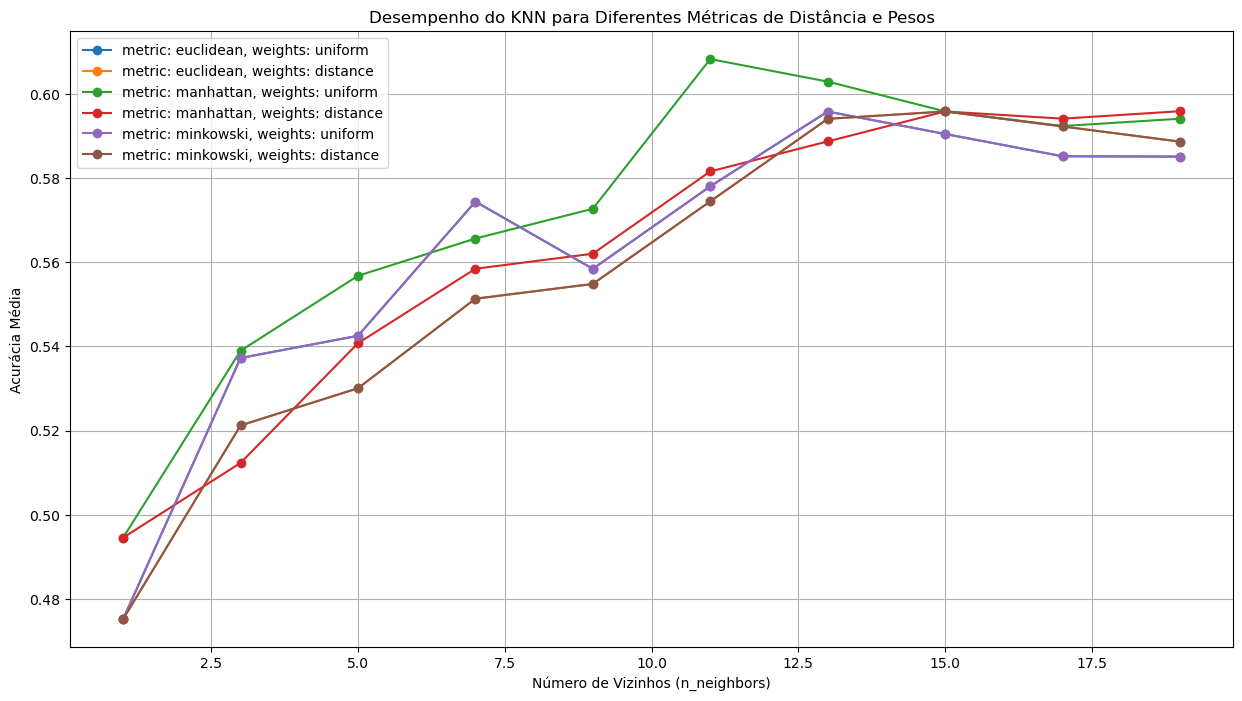

Melhores Parâmetros:  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Melhor score de validação cruzada (acurácia): 0.6082332490518331


In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import joblib

# Definindo a grade de hiperparâmetros
param_grid_knn = {
    'n_neighbors': range(1, 20, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Configurando a busca em grade com validação cruzada
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

# Exportando o melhor modelo
joblib.dump(grid_knn.best_estimator_, 'knn_best_model.joblib')

import pandas as pd
import matplotlib.pyplot as plt

# Preparação dos dados para o gráfico
results_knn = pd.DataFrame(grid_knn.cv_results_)

# Gráfico de desempenho
plt.figure(figsize=(15, 8))
for metric in param_grid_knn['metric']:
    for weight in param_grid_knn['weights']:
        filtered_results = results_knn[(results_knn['param_metric'] == metric) & (results_knn['param_weights'] == weight)]
        plt.plot(filtered_results['param_n_neighbors'], filtered_results['mean_test_score'], marker='o', label=f'metric: {metric}, weights: {weight}')
plt.xlabel('Número de Vizinhos (n_neighbors)')
plt.ylabel('Acurácia Média')
plt.title('Desempenho do KNN para Diferentes Métricas de Distância e Pesos')
plt.legend()
plt.grid(True)
plt.show()

## Exibir os melhores parâmetros
print("Melhores Parâmetros: ", grid_knn.best_params_)
print("Melhor score de validação cruzada (acurácia):", grid_knn.best_score_)

c:\Users\luboh\anaconda3\envs\spotenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


KeyError: 'neurons'

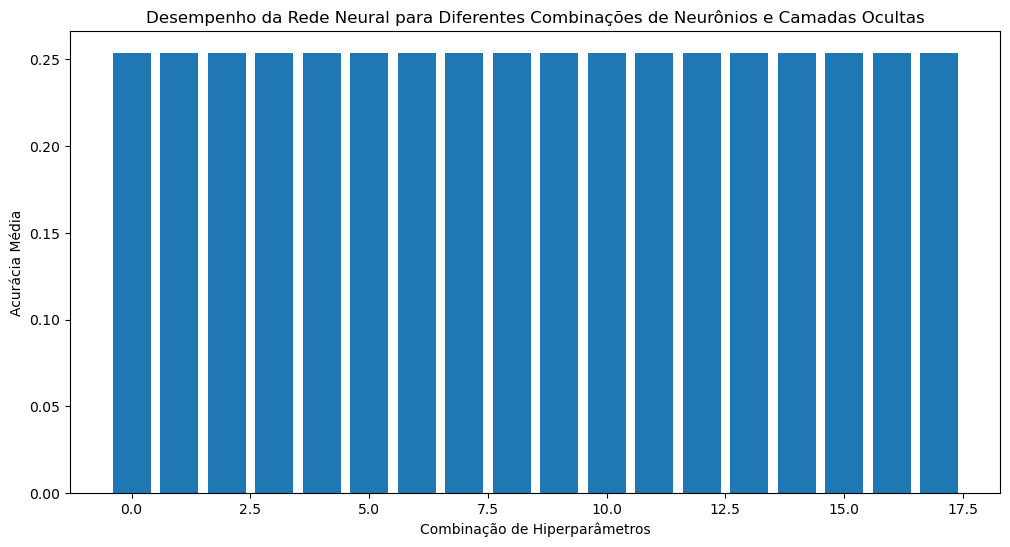

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
import joblib

# Função para criar o modelo Keras, agora aceitando o número de camadas ocultas como um parâmetro
def build_model(hidden_layers=1, neurons=10, activation='relu'):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(X_train.shape[1],), activation=activation))
    for _ in range(hidden_layers - 1):  # Adicionando a quantidade de camadas ocultas
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Exemplo para classificação binária
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Criação do KerasClassifier
model = KerasClassifier(model=build_model, epochs=100, batch_size=10, verbose=0)

# Definindo a grade de hiperparâmetros
param_grid_nn = {
    'model__hidden_layers': [1, 2, 3],  # Atenção ao prefixo 'model__'
    'model__neurons': [5, 10, 15],
    'model__activation': ['relu', 'tanh']
}

# Configurando a busca em grade com validação cruzada
grid_nn = GridSearchCV(estimator=model, param_grid=param_grid_nn, cv=3)
grid_nn.fit(X_train, y_train)

# Exportando o melhor modelo
best_nn_model = grid_nn.best_estimator_.model_
best_nn_model.save('neural_network_best_model.h5')


import matplotlib.pyplot as plt
import pandas as pd

# Preparação dos dados para o gráfico
results_nn = pd.DataFrame(grid_nn.cv_results_)

# Gráfico de desempenho
plt.figure(figsize=(12, 6))
plt.bar(range(len(results_nn)), results_nn['mean_test_score'])
plt.xlabel('Combinação de Hiperparâmetros')
plt.ylabel('Acurácia Média')
plt.title('Desempenho da Rede Neural para Diferentes Combinações de Neurônios e Camadas Ocultas')
plt.xticks(range(len(results_nn)), labels=results_nn['params'].apply(lambda x: f"Neurônios: {x['neurons']}, Camadas: {x['hidden_layers']}"), rotation=90)
plt.show()

## Exibir os melhores parâmetros
print("Melhores Parâmetros: ", grid_nn.best_params_)
print("Melhor score de validação cruzada (acurácia):", grid_nn.best_score_)

In [45]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.15.0
Keras version: 2.15.0
